In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.shape

(21, 2)

In [4]:
#Spliting of X and Y
x = df[["Sorting Time"]]
y = df[["Delivery Time"]]

In [5]:
#Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
df.head()
df.tail()
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [8]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<Axes: >

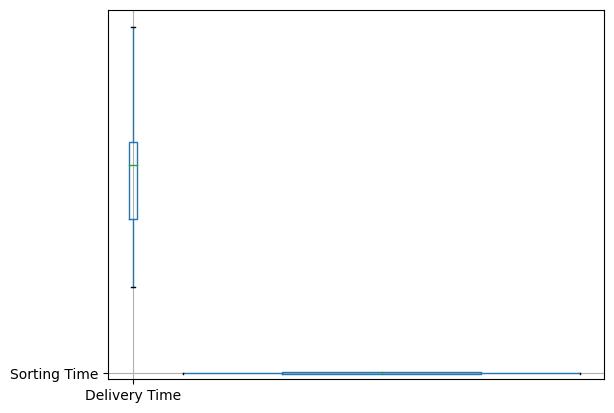

In [9]:
#To find outliers
df.boxplot(column='Sorting Time',vert=False)
df.boxplot(column='Delivery Time')

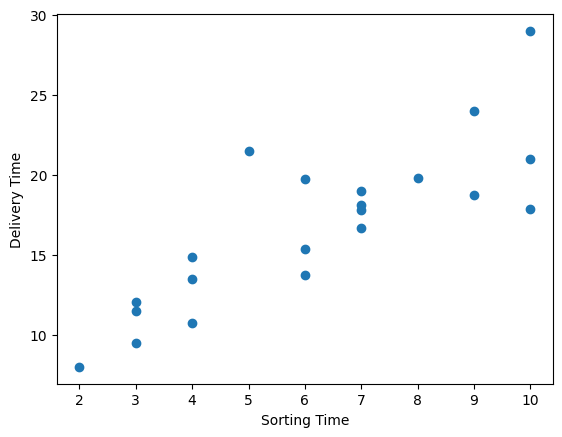

In [10]:
#Data visulation
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [11]:
#colinear
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [12]:
#Model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)
LR.intercept_
LR.coef_

array([[1.6490199]])

In [13]:
#Predectoin
df[["Sorting Time"]]
deli_pred = LR.predict(x)
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


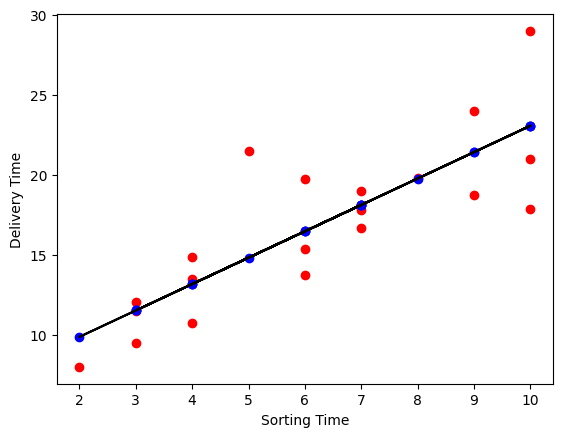

In [14]:
#constructing regrassion line between model predicted values and original values
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red')
plt.scatter(x,y=deli_pred,color='blue')
plt.plot(df[['Sorting Time']],deli_pred,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [15]:
#Finding Errors by using Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y,deli_pred)
R2= r2_score(y, deli_pred)
print("Mean_squared_error:", mse.round(3))
print("Root Mean Sqaure error:",np.sqrt(mse).round(3))
print("R square:", R2.round(3))

Mean_squared_error: 7.793
Root Mean Sqaure error: 2.792
R square: 0.682


In [16]:
np.min(x)
np.max(x)

10

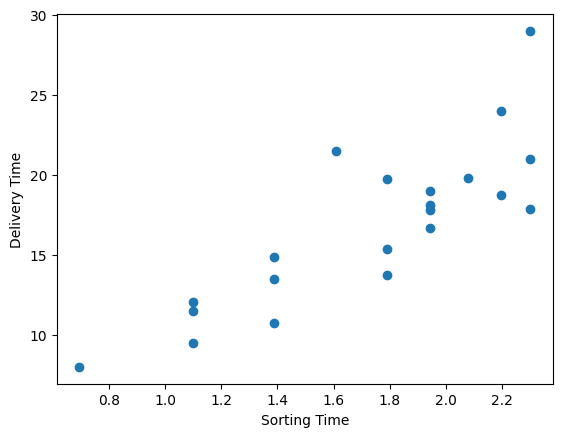

In [17]:
#Applying log transfromation to x

x_log = np.log(df[["Sorting Time"]])

#Data visulation
import matplotlib.pyplot as plt
plt.scatter(x_log,y)
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [18]:
#Model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_log,y)
LR.intercept_
LR.coef_

#Predectoin
df[["Sorting Time"]]
deli_pred = LR.predict(x_log)
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


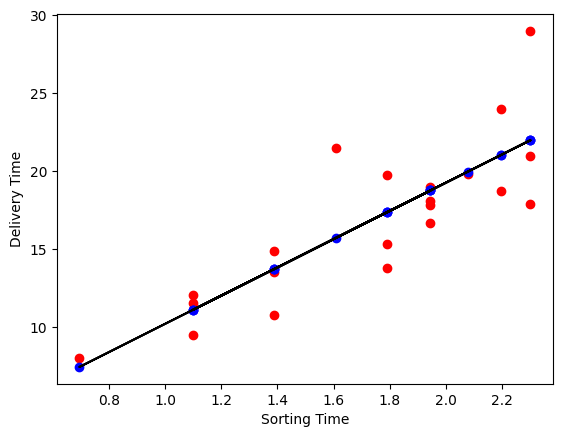

In [19]:
#constructing regrassion line between model predicted values and original values
import matplotlib.pyplot as plt
plt.scatter(x_log,y,color='red')
plt.scatter(x_log,deli_pred,color='blue')
plt.plot(x_log,deli_pred,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [20]:
#Finding Errors by using Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y,deli_pred)
R2= r2_score(y, deli_pred)
print("Mean_squared_error:", mse.round(3))
print("Root Mean Sqaure error:",np.sqrt(mse).round(3))
print("R square:", R2.round(3))

Mean_squared_error: 7.47
Root Mean Sqaure error: 2.733
R square: 0.695


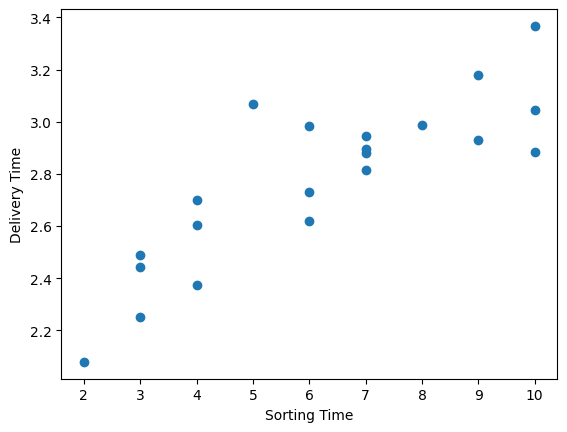

array([[0.1055516]])

In [21]:
#Applying log transfromation to y

y_log = np.log(df[["Delivery Time"]])

#Data visulation
import matplotlib.pyplot as plt
plt.scatter(x,y_log)
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

#Model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y_log)
LR.intercept_
LR.coef_

In [22]:
#Predectoin
df[["Sorting Time"]]
deli_pred = LR.predict(x)
y_log

,Delivery Time
0,3.044522
1,2.602690
2,2.983153
3,3.178054
4,3.367296
5,2.731115
6,2.944439
7,2.251292
8,2.884801
9,2.931194


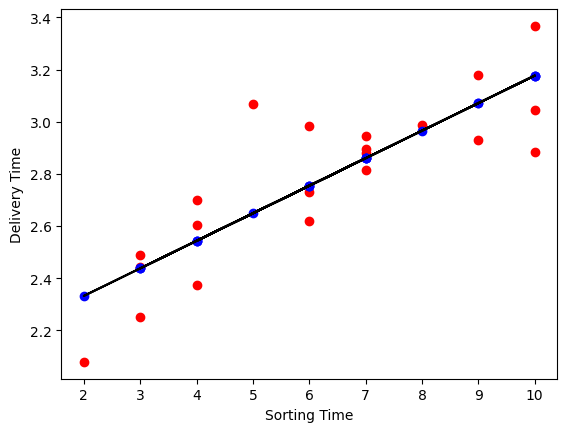

In [23]:
#constructing regrassion line between model predicted values and original values
import matplotlib.pyplot as plt
plt.scatter(x,y_log,color='red')
plt.scatter(x,deli_pred,color='blue')
plt.plot(x,deli_pred,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [24]:
#Finding Errors by using Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_log,deli_pred)
R2= r2_score(y_log, deli_pred)
print("Mean_squared_error:", mse.round(3))
print("Root Mean Sqaure error:",np.sqrt(mse).round(3))
print("R square:", R2.round(3))

Mean_squared_error: 0.028
Root Mean Sqaure error: 0.167
R square: 0.711


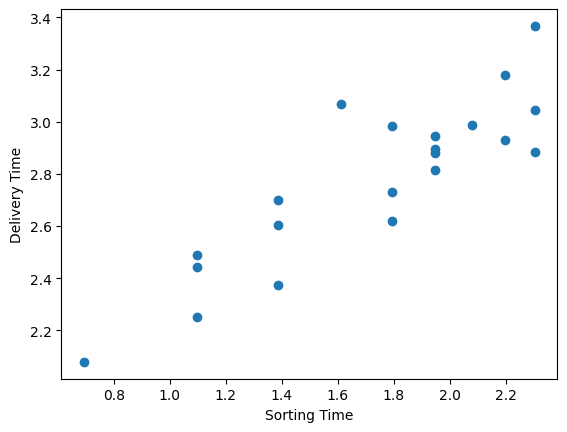

,Delivery Time
0,3.044522
1,2.602690
2,2.983153
3,3.178054
4,3.367296
5,2.731115
6,2.944439
7,2.251292
8,2.884801
9,2.931194


In [25]:
#Applying log transfromation to x and y
x_log = np.log(df[["Sorting Time"]])
y_log = np.log(df[["Delivery Time"]])

#Data visulation
import matplotlib.pyplot as plt
plt.scatter(x_log,y_log)
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

#Model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_log,y_log)
LR.intercept_
LR.coef_

#Predectoin
df[["Sorting Time"]]
deli_pred = LR.predict(x_log)
y_log

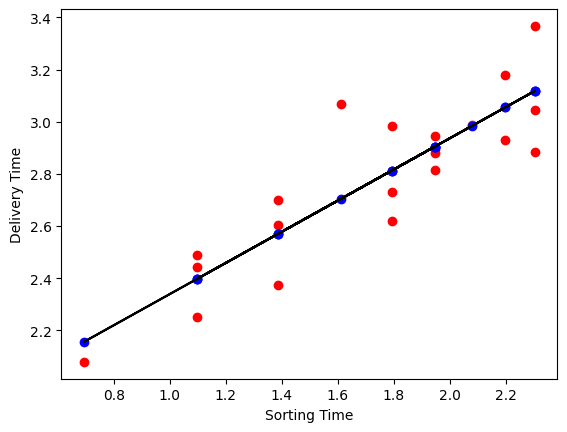

In [26]:
#constructing regrassion line between model predicted values and original values
import matplotlib.pyplot as plt
plt.scatter(x_log,y_log,color='red')
plt.scatter(x_log,deli_pred,color='blue')
plt.plot(x_log,deli_pred,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [27]:
#Finding Errors by using Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_log,deli_pred)
R2= r2_score(y_log, deli_pred)
print("Mean_squared_error:", mse.round(3))
print("Root Mean Sqaure error:",np.sqrt(mse).round(3))
print("R square:", R2.round(3))

Mean_squared_error: 0.022
Root Mean Sqaure error: 0.148
R square: 0.772


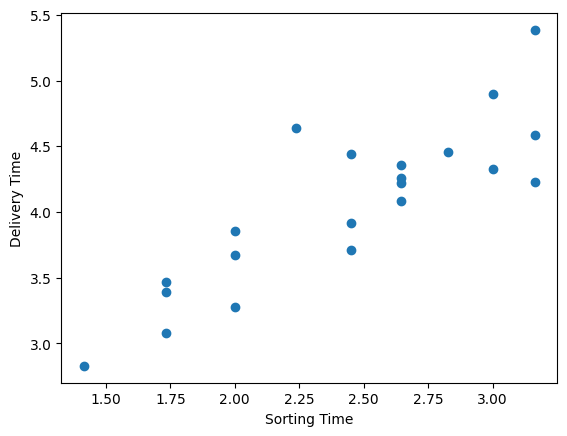

,Delivery Time
0,4.582576
1,3.674235
2,4.444097
3,4.898979
4,5.385165
5,3.917908
6,4.358899
7,3.082207
8,4.230839
9,4.330127


In [28]:
#Applying Sq Root Transformation of X x and y
x_sq = np.sqrt(df[["Sorting Time"]])
y_sq = np.sqrt(df[["Delivery Time"]])

#Data visulation
import matplotlib.pyplot as plt
plt.scatter(x_sq,y_sq)
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

#Model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_sq,y_sq)
LR.intercept_
LR.coef_

#Predectoin
df[["Sorting Time"]]
deli_pred = LR.predict(x_sq)
y_sq

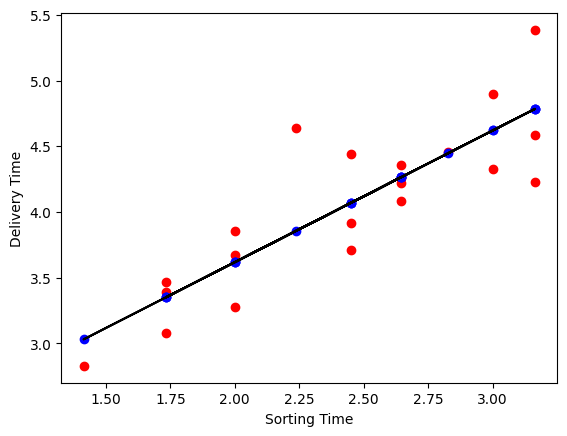

In [29]:
#constructing regrassion line between model predicted values and original values
import matplotlib.pyplot as plt
plt.scatter(x_sq,y_sq,color='red')
plt.scatter(x_sq,deli_pred,color='blue')
plt.plot(x_sq,deli_pred,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()


In [30]:
#Finding Errors by using Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_sq,deli_pred)
R2= r2_score(y_sq, deli_pred)
print("Mean_squared_error:", mse.round(3))
print("Root Mean Sqaure error:",np.sqrt(mse).round(3))
print("R square:", R2.round(3))

Mean_squared_error: 0.101
Root Mean Sqaure error: 0.318
R square: 0.729
